In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [12]:
dataset = pd.read_csv("C://Users//YASH//Desktop//DataScienceML//Datasets//manufacturing//manufacturing.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


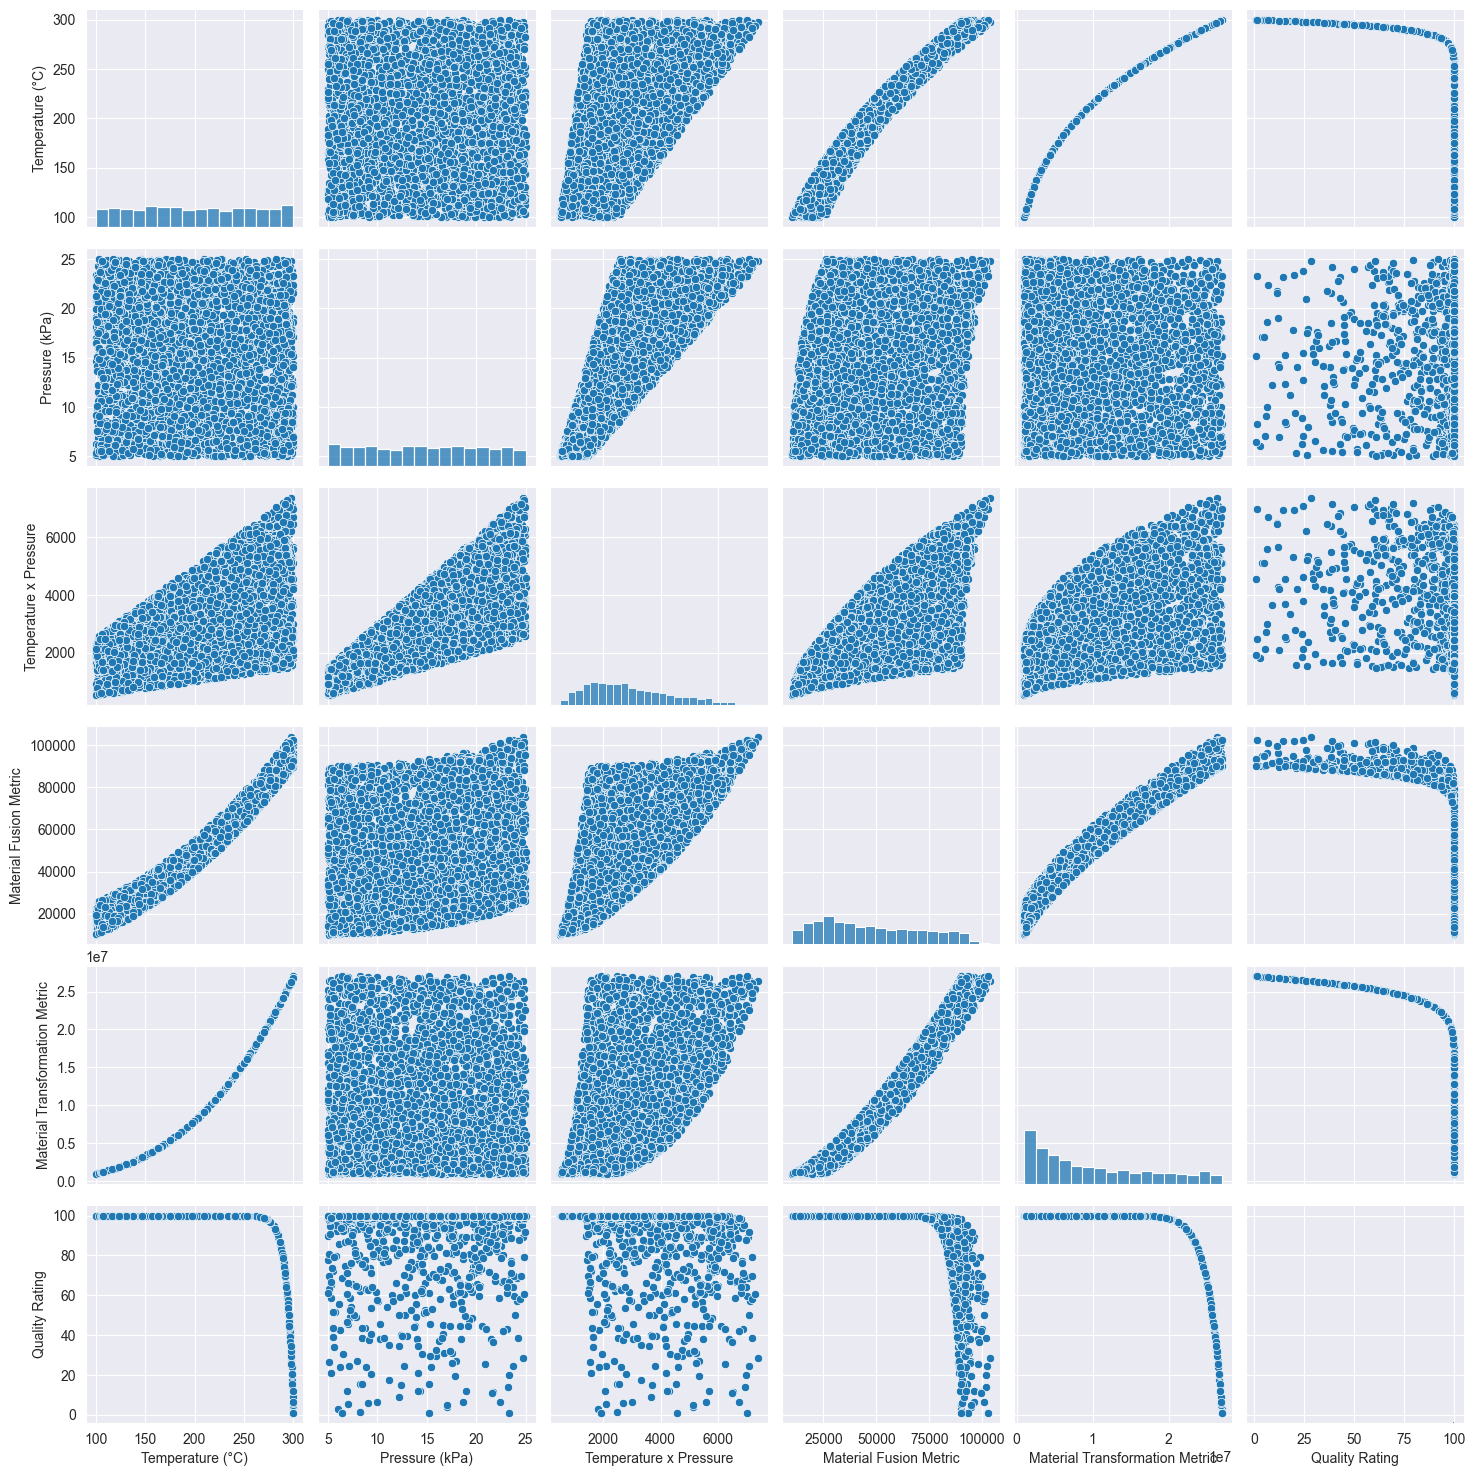

In [4]:
sns.pairplot(dataset)

In [5]:
dataset.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')

<Axes: xlabel='Temperature x Pressure', ylabel='Quality Rating'>

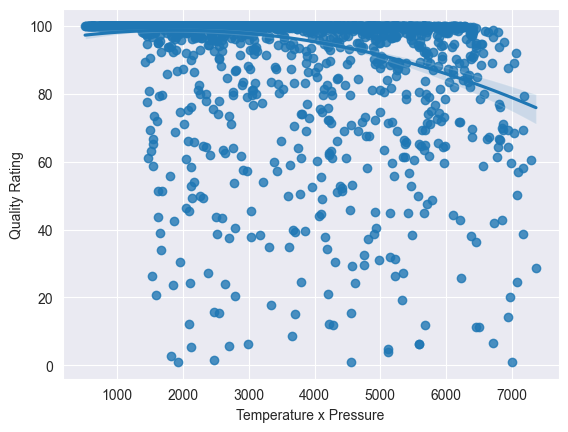

In [6]:
sns.regplot(data = dataset, x = 'Temperature x Pressure', y = 'Quality Rating', order = 2)

<Axes: >

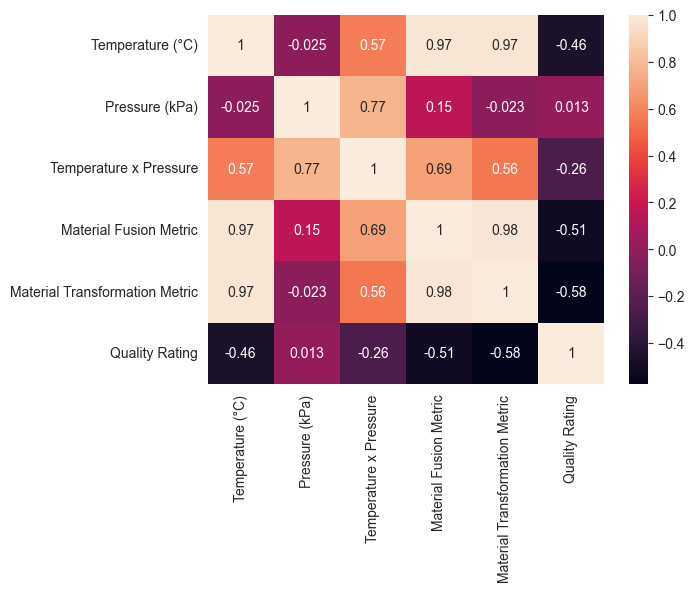

In [7]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
dataset.drop_duplicates()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [29]:
def train_model(x, y, title: str):
    # Split data first
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Scale features (only fit on training data)
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=True)
    x_poly = poly.fit_transform(x_scaled)
    x_train_poly = poly.fit_transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)

    # Train model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Predictions
    y_pred = model.predict(x_test_poly)
    y_train_pred = model.predict(x_train_poly)  # For training metrics

    # Calculate metrics
    metrics = {
        'Model': title,
        'Features': x.columns.tolist(),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_pred),
        'RMSE': root_mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'Adjusted R2': 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - x.shape[1] - 1),
        'Train/Test MSE Ratio': mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred)
    }

    # Print metrics
    print(f"\n{title}")
    print("-" * 50)
    for key, value in metrics.items():
        if key not in ['Model', 'Features']:
            if isinstance(value, float):
                print(f"\t{key}: {value:.4f}")
            else:
                print(f"\t{key}: {value}")
    print("-" * 50)
    r2 = cross_val_score(model, x_poly, y, cv=5, scoring="r2")
    print(f"Safety Score for r2: {r2.mean()}")
    print(f"Safety Score for adjusted r2: {1 - ((1 - r2.mean()) * (len(y) - 1)) / (len(y) - x.shape[1] - 1)}")

    return model, metrics

In [11]:
dataset.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')

In [15]:
df1 = dataset[['Temperature (°C)', 'Pressure (kPa)', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']]
df2 = dataset[['Temperature (°C)', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']]
df3 = dataset[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']]
df4 = dataset[['Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']]

In [30]:
model1, metrics1 = train_model(df1.iloc[:, :-1], df1.iloc[:, -1], 'Model  without TxP')
model2, metrics2 = train_model(df2.iloc[:, :-1], df2.iloc[:, -1], 'Model  without TxP and Pressure')
model3, metrics3 = train_model(df3.iloc[:, :-1], df3.iloc[:, -1], 'Model  with all features')
model4, metrics4 = train_model(df4.iloc[:, :-1], df4.iloc[:, -1], 'Model  with TxP but not temperature and pressure')


Model  without TxP
--------------------------------------------------
	Train MSE: 11.8932
	Test MSE: 14.8592
	RMSE: 3.8548
	MAE: 2.4831
	R2: 0.9272
	Adjusted R2: 0.9268
	Train/Test MSE Ratio: 0.8004
--------------------------------------------------
Safety Score for r2: 0.9247067630093057
Safety Score for adjusted r2: 0.924630555279558

Model  without TxP and Pressure
--------------------------------------------------
	Train MSE: 11.9502
	Test MSE: 14.7932
	RMSE: 3.8462
	MAE: 2.4968
	R2: 0.9275
	Adjusted R2: 0.9273
	Train/Test MSE Ratio: 0.8078
--------------------------------------------------
Safety Score for r2: 0.9249718483999821
Safety Score for adjusted r2: 0.9249149082393953

Model  with all features
--------------------------------------------------
	Train MSE: 11.8428
	Test MSE: 15.0277
	RMSE: 3.8766
	MAE: 2.4735
	R2: 0.9264
	Adjusted R2: 0.9259
	Train/Test MSE Ratio: 0.7881
--------------------------------------------------
Safety Score for r2: 0.9243940447836619
Safety Scor

In [23]:
dataset.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000
